<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C3/C3.html"><img src="../data/C3_nav.png" width="100"  style="float:right;" alt="C3"></a>
<h1>Temporal Smoothing and Downsampling</h1> 
</div>

<br/>

<p>
In this notebook, we discuss temporal smoothing and downsampling techniques for postprocessing feature representations. Parts of the notebook follow Section 3.1.2.3 and Section 7.2.1 of <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>.
    
<ul>    
<li><span style="color:black">
Meinard Müller, Frank Kurth, and Michael Clausen: <strong><a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2005_MuellerKurthClausen_ChromaAudioFeatures_WASPAA.pdf">Chroma-Based Statistical Audio Features for Audio Matching.</a></strong> Proceedings of the Workshop on Applications of Signal Processing (WASPAA), USA, 275&ndash;278, 2005. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_MuellerKC05_ChromaFeatures_WASPAA.txt"> Bibtex </a>
</span></li>    
    
<li><span style="color:black">
Meinard Müller and Sebastian Ewert: <strong><a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2011_MuellerEwert_ChromaToolbox_ISMIR.pdf">Chroma Toolbox: MATLAB implementations for extracting variants of chroma-based audio features.</a></strong> Proceedings of the International Conference on Music Information Retrieval (ISMIR), Miami, Florida, USA, pp. 215–220, 2011.
<br>
 <a href="https://www.audiolabs-erlangen.de/resources/MIR/chromatoolbox">Website of the Chroma Toolbox.</a>
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_MuellerEwert11_ChromaToolbox_ISMIR.txt"> Bibtex </a>
</span></li>
</ul>  

</p> 

## Beethoven Example

There are many ways of converting music recordings into chroma-based feature representations. For example, we studied how to derive [chroma features from a spectrogram](../C3/C3S1_SpecLogFreq-Chromagram.html) by suitably pooling Fourier coefficients. By applying pre- and postprocessing steps, the properties of chroma features can be changed significantly. For example, we have seen that one can increase the robustness to variations in timbre or sound intensity by performing additional [logarithmic compression](../C3/C3S1_LogCompression.html) and [normalization](../C3/C3S1_FeatureNormalization.html) steps. In this notebook, we study further postprocessing techniques that can be used for making a feature sequence more robust to variations in aspects such as local tempo, articulation, and note execution.

To illustrate the effect of the various postprocessing techniques, we use in this notebook the beginning of Beethoven's Fifth Symphony as our running example. As for the recordings, we consider different real and synthesized performances of the piece including orchestral versions, piano versions, and a string quartet version. 

<!--<img src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Orchestra.png" width="500px" align="middle" alt="C3">-->

<img src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Piano.png" width="900px" align="middle" alt="C3">



<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:left;">Performer</th>
      <th style="border:none;text-align:left;">Instrumentation</th>
      <th style="border:none;text-align:left;">Audio</th>
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Bernstein</td>
      <td style="border:none;text-align:left;">Orchestra</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Bernstein.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Karajan</td>
      <td style="border:none;text-align:left;">Orchestra</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Karajan1946.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">MIDI-Orchestra</td>
      <td style="border:none;text-align:left;">Orchestra</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Orchestra-Fast.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">MIDI-Piano</td>
      <td style="border:none;text-align:left;">Piano</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Piano.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Scherbakov</td>
      <td style="border:none;text-align:left;">Piano</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Scherbakov.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">MIDI-Quartet</td>
      <td style="border:none;text-align:left;">String quartet</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C3/FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Quartett.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>   
</table>

The following figure shows chroma-based feature representations for some of these performances. The chromagrams are [normalized](../C3/C3S1_FeatureNormalization.html) with respect to the Euclidean norm. Even though different interpretations exhibit significant variations in articulation and instrumentation, the chromagrams show a similar progression of the chroma distribution over time. 

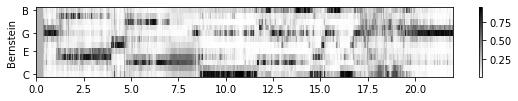

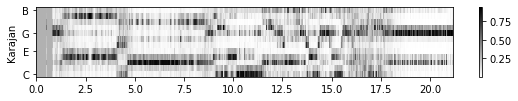

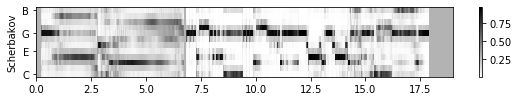

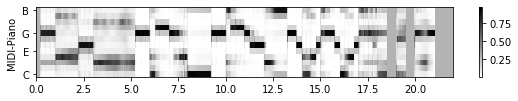

In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import librosa
from scipy import signal

sys.path.append('..')
import LibFMP.B
import LibFMP.C3

%matplotlib inline

fn_wav_dict = {}
fn_wav_dict['Bernstein'] = os.path.join('..', 'data', 'C3', 'FMP_C3S3_Beethoven_Fifth-MM1-20_Bernstein.wav')
fn_wav_dict['Karajan'] = os.path.join('..', 'data', 'C3', 'FMP_C3S3_Beethoven_Fifth-MM1-20_Karajan1946.wav')
#fn_wav_dict['MIDI-Orchestra'] = os.path.join('..', 'data', 'C3', 'FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Orchestra-Fast.wav')
fn_wav_dict['Scherbakov']= os.path.join('..', 'data', 'C3', 'FMP_C3S3_Beethoven_Fifth-MM1-20_Scherbakov.wav')
fn_wav_dict['MIDI-Piano']= os.path.join('..', 'data', 'C3', 'FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Piano.wav')
#fn_wav_dict['MIDI-Piano'] = os.path.join('..', 'data', 'C3', 'FMP_C3S3_Beethoven_Fifth-MM1-20_Midi-Piano.wav')
#fn_wav_dict['MIDI-Quartet']= os.path.join('..', 'data', 'C3', 'FMP_C3S3_Beethoven_Fifth-MM1-20_Sibelius-Quartett.wav')

N, H = 2048, 1024
figsize = (8, 1.5)
yticks = [0, 4, 7, 11]

C_dict = {}
for name in fn_wav_dict:
    fn_wav = fn_wav_dict[name] 
    x, Fs = librosa.load(fn_wav)
    C = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
    Fs_C = Fs / H
    C = C / C.max()
    threshold = 0.0001
    C_dict[name] = LibFMP.C3.normalize_feature_sequence(C, norm='2', threshold=threshold)
    LibFMP.B.plot_chromagram(C_dict[name], Fs_C, figsize=figsize, ylabel=name, xlabel='', chroma_yticks=yticks)

## Temporal Smoothing and Downsampling

For certain music retrieval applications, these chromagrams may be too detailed. In particular, it may be desirable to further increase the similarity between them. We now show how this can be achieved by **smoothing procedures** applied in a postprocessing step. The idea is to compute for each chroma dimension a kind of local average over time. More precisely, let $X=(x_1,x_2, ..., x_N)$ be a feature sequence with $x_n\in\mathbb{R}^K$ for $n\in[1:N]$, and let $w$ be a [rectangular window](../C2/C2_STFT-Window.html) $w$ of length $L\in\mathbb{N}$. Then we compute for each $k\in[1:K]$ a convolution between $w$ and the sequence $(x_1(k), x_2(k),\ldots, x_N(k))$. Assuming a [centered view](../C2/C2_STFT-Conventions.html), we only keep the center part of length $N$ of the convolution. The result is a smoothed feature sequence of the same dimensions $K\times N$.

* In the following implementation, we use the function `scipy.signal.convolve` to compute a 2D convolution. Setting the dimension to $1\times L$ for the **window** (also called **kernel**) results in a bandwise 1D convolution.
* Using the parameter `mode='same'` enforces the centered view.
* As for the window $w$, one may also use other [window types](../C2/C2_STFT-Window.html) such as a **Hann window**. 

Applying temporal smoothing using a rectangular or a Hann window can be regarded as bandwise  **lowpass filtering**, which attenuates fast temporal fluctuations in the feature representation. Often, to increase the efficiency of subsequent processing and analysis steps, one decimates the smoothed representation by keeping only every $H^\mathrm{th}$ feature, where $H\in\mathbb{N}$ is a suitable constant (typically much smaller than the window length $L$). This decimation, which is also referred to as **downsampling**, reduces the feature rate by a factor $H$. 

The following figure shows the effect of our smoothing procedure continuing our Beethoven example from above. After smoothing with a rectangular window of length $L=11$, we apply feature normalization using the Euclidean norm, and finally apply downsampling by $H=2$. 

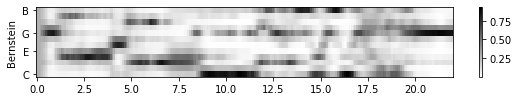

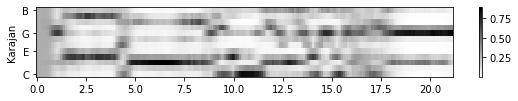

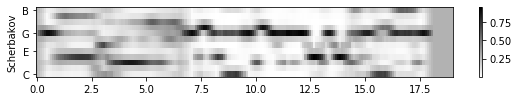

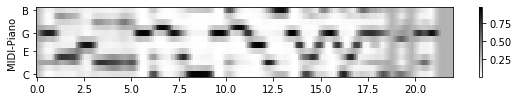

In [2]:
def smooth_downsample_feature_sequence(X, Fs, filt_len=41, down_sampling=10, w_type='boxcar'):
    """Smoothes and downsamples a feature sequence. Smoothing is achieved by convolution with a filter kernel

    Notebook: C3/C3S1_FeatureSmoothing.ipynb

    Args:
        X: Feature sequence
        Fs: Frame rate of `X`
        filt_len: Length of smoothing filter
        down_sampling: Downsampling factor
        w_type: Window type of smoothing filter

    Returns:
        X_smooth: Smoothed and downsampled feature sequence
        Fs_feature: Frame rate of `X_smooth`
    """
    filt_kernel = np.expand_dims(signal.get_window(w_type, filt_len), axis=0)
    X_smooth = signal.convolve(X, filt_kernel, mode='same') / filt_len
    X_smooth = X_smooth[:, ::down_sampling]
    Fs_feature = Fs / down_sampling
    return X_smooth, Fs_feature

filt_len = 11
down_sampling = 2
C_smooth_dict = {}    
for name in fn_wav_dict:   
    C_smooth, Fs_C_smooth = smooth_downsample_feature_sequence(C_dict[name], Fs_C, 
                                        filt_len=filt_len, down_sampling=down_sampling)
    C_smooth_dict[name] = LibFMP.C3.normalize_feature_sequence(C_smooth, norm='2', threshold=threshold)
    LibFMP.B.plot_chromagram(C_smooth_dict[name], Fs_C_smooth, figsize=figsize, 
                             ylabel=name, title='',  xlabel='', chroma_yticks=yticks)

## Smoothing via Median Filtering

An alternative to applying a local averaging filter is **median filtering**, which also results in some smoothing while better preserving sharp transitions. The **median** of a finite list of numbers is the numerical value with the property that half the numbers fall below the value and half above it. The median can be computed by arranging all the numbers from lowest value to highest value and picking the middle one. If there is an even number of observations, then there is no single middle value; the median is then usually defined to be the mean of the two middle values. For example, the median of the list $(5,3,2,8,2)$ is $3$, while the median of the  list $(5,3,2,8)$ is $4$. The idea of **median filtering** is to replace each entry of a sequence with the **median** of neighboring entries. The size of the neighborhood is determined by a parameter $L\in\mathbb{N}$, which is the **length** of the median filter applied. Given a sequence $X=(x_1,x_2, ..., x_N)$ of feature vectors $x_n\in\mathbb{R}^K$, we apply median filtering for each dimension for each $k\in[1:K]$ (just as we did with average smoothing). 

* In the following implementation, we use the function `scipy.signal.medfilt2d` to compute a 2D median filtering. Using median filtering with kernel size $1\times L$ results in a bandwise 1D median filtering.
* When using `scipy.signal.medfilt2d`, the median filter length $L$ needs to be odd.
* The output array of median filtering has the same dimensions as the input array. Boundary issues are handled by zero padding.  

In the following code cell, we give a toy example to illustrate the definition and properties of median filtering.

In [3]:
X = np.array([[1, 2, 3, 4, 5], [5, 6, 7, 8, 9], [5, 3, 2, 8, 2]], dtype='float')
L = 3
filt_len = [1, L]
X_smooth = signal.medfilt2d(X, filt_len)
print('Input array X of dimension (K,N) with K=3 and N=5')
print(X)
print('Output array after median filtering with L=3')
print(X_smooth)

Input array X of dimension (K,N) with K=3 and N=5
[[1. 2. 3. 4. 5.]
 [5. 6. 7. 8. 9.]
 [5. 3. 2. 8. 2.]]
Output array after median filtering with L=3
[[1. 2. 3. 4. 4.]
 [5. 6. 7. 8. 8.]
 [3. 3. 3. 2. 2.]]


Continuing our Beethoven example, the following figure compares the original chromagram with its smoothed versions&mdash;once applying average filtering and once median filtering. In the original chromagram, one can observe sharp edges that are the result of note transition (e.g. look at the two fate motives at the beginning with transitions $\mathrm{G}$, $\mathrm{E}^\flat$, $\mathrm{F}$, $\mathrm{D}$). While average smoothing introduces a smearing between these transitions, median smoothing tends to better preserve the sharp edges.  

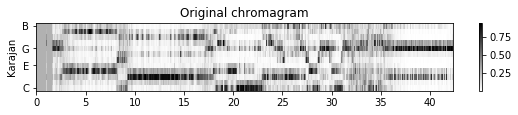

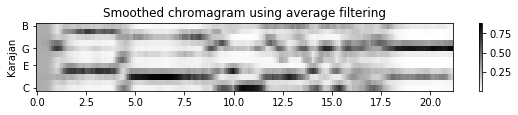

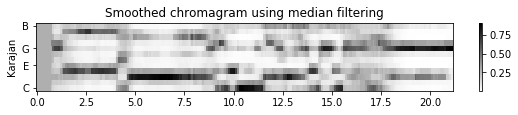

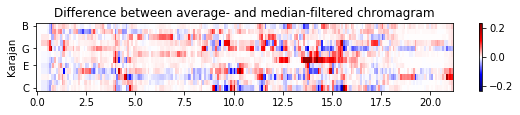

In [4]:
def median_downsample_feature_sequence(X, Fs, filt_len=41, down_sampling=10):
    """Smoothes and downsamples a feature sequence. Smoothing is achieved by median filtering

    Notebook: C3/C3S1_FeatureSmoothing.ipynb

    Args:
        X: Feature sequence
        Fs: Frame rate of `X`
        filt_len: Length of smoothing filter
        down_sampling: Downsampling factor

    Returns:
        X_smooth: Smoothed and downsampled feature sequence
        Fs_feature: Frame rate of `X_smooth`
    """
    assert filt_len % 2 == 1  # L needs to be odd
    filt_len = [1, filt_len]
    X_smooth = signal.medfilt2d(X, filt_len)
    X_smooth = X_smooth[:, ::down_sampling]
    Fs_feature = Fs / down_sampling
    return X_smooth, Fs_feature

filt_len = 11
down_sampling = 2
C_median_dict = {}    
for name in fn_wav_dict:   
    C_median, Fs_C_smooth = median_downsample_feature_sequence(C_dict[name],  Fs_C,
                                                               filt_len=filt_len, down_sampling=down_sampling)
    C_median_dict[name] = LibFMP.C3.normalize_feature_sequence(C_median, norm='2', threshold=threshold)

figsize=(8, 1.7)

name = 'Karajan'
LibFMP.B.plot_chromagram(C_dict[name], Fs_C_smooth, figsize=figsize, ylabel = name,
                         title='Original chromagram', xlabel='', chroma_yticks=yticks)
LibFMP.B.plot_chromagram(C_smooth_dict[name], Fs_C_smooth, figsize=figsize, ylabel = name,
                         title='Smoothed chromagram using average filtering', xlabel='', chroma_yticks=yticks) 
LibFMP.B.plot_chromagram(C_median_dict[name], Fs_C_smooth, figsize=figsize, ylabel = name, 
                         title='Smoothed chromagram using median filtering', xlabel='', chroma_yticks=yticks)  

C_diff = C_smooth_dict[name] - C_median_dict[name]
m = np.max(np.abs(C_diff))
LibFMP.B.plot_chromagram(C_diff, Fs_C_smooth, cmap='seismic', clim=[-m, m], figsize=figsize,
                         title='Difference between average- and median-filtered chromagram', xlabel='',
                         ylabel=name, chroma_yticks=yticks);

## Further Notes

In summary, there are many ways to enhance and modify a feature representation (e.g., a chromagram) by applying techniques such as [logarithmic compression](../C3/C3S1_LogCompression.html), [feature normalization](../C3/C3S1_FeatureNormalization.html), smoothing, and downsampling. The described techniques provide flexible and computationally inexpensive tools for adjusting the feature specificity and resolution without repeating the cost-intensive spectral audio decomposition. Here are some further comments and links:

* An alternative to temporal smoothing based on convolution with a window of fixed length is the usage of a [beat-synchronous feature representation](../C6/C6S3_AdaptiveWindowing.html). In this case, a windowed section is determined by two consecutive beat positions, which results in one feature vector per beat. This technique will be discuss in the [FMP notebook on adaptive windowing](../C6/C6S3_AdaptiveWindowing.html).

* Given a short query audio clip and a music database, the task of [audio matching](../C7/C7S2_AudioMatching.html) aims at retrieving from the database all audio excerpts that are musically related to the query. Within this application scenario, enhanced and smoothed chroma-based audio features are studied in the [FMP notebook on feature design](../C7/C7S2_CENS.html). 

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/arifi-mueller">Vlora Arifi-Müller</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>